In [21]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
file_path = r'C:\Users\PROGRESSIVE\africa_food_prices.csv'
df = pd.read_csv(file_path)

# Data Cleaning and Transformation

In [23]:
print(df.head())

   Unnamed: 0  country_id  country  state_id  state  market_id   market  \
0       15427         4.0  Algeria       344  Alger       1794  Algiers   
1       15428         4.0  Algeria       344  Alger       1794  Algiers   
2       15429         4.0  Algeria       344  Alger       1794  Algiers   
3       15430         4.0  Algeria       344  Alger       1794  Algiers   
4       15431         4.0  Algeria       344  Alger       1794  Algiers   

   produce_id        produce  currency_id currency  pt_id market_type  \
0          52  Rice - Retail          0.0      DZD     15      Retail   
1          52  Rice - Retail          0.0      DZD     15      Retail   
2          52  Rice - Retail          0.0      DZD     15      Retail   
3          52  Rice - Retail          0.0      DZD     15      Retail   
4          52  Rice - Retail          0.0      DZD     15      Retail   

   um_unit_id quantity  month  year  price  mp_commoditysource  
0           5       KG      4  2015   90.0   

##### Remove Empty Column

In [24]:
df = df.drop('mp_commoditysource', axis=1)
df = df.drop('currency_id', axis=1)
print(df)

        Unnamed: 0  country_id   country  state_id     state  market_id  \
0            15427         4.0   Algeria       344     Alger       1794   
1            15428         4.0   Algeria       344     Alger       1794   
2            15429         4.0   Algeria       344     Alger       1794   
3            15430         4.0   Algeria       344     Alger       1794   
4            15431         4.0   Algeria       344     Alger       1794   
...            ...         ...       ...       ...       ...        ...   
956774     2050633       271.0  Zimbabwe      3444  Midlands       5594   
956775     2050634       271.0  Zimbabwe      3444  Midlands       5594   
956776     2050635       271.0  Zimbabwe      3444  Midlands       5594   
956777     2050636       271.0  Zimbabwe      3444  Midlands       5594   
956778     2050637       271.0  Zimbabwe      3444  Midlands       5594   

            market  produce_id                  produce currency  pt_id  \
0          Algiers      

##### Rename Column

In [25]:
df= df.rename(columns={'Unnamed: 0': 'S/N'})
print (df)

            S/N  country_id   country  state_id     state  market_id  \
0         15427         4.0   Algeria       344     Alger       1794   
1         15428         4.0   Algeria       344     Alger       1794   
2         15429         4.0   Algeria       344     Alger       1794   
3         15430         4.0   Algeria       344     Alger       1794   
4         15431         4.0   Algeria       344     Alger       1794   
...         ...         ...       ...       ...       ...        ...   
956774  2050633       271.0  Zimbabwe      3444  Midlands       5594   
956775  2050634       271.0  Zimbabwe      3444  Midlands       5594   
956776  2050635       271.0  Zimbabwe      3444  Midlands       5594   
956777  2050636       271.0  Zimbabwe      3444  Midlands       5594   
956778  2050637       271.0  Zimbabwe      3444  Midlands       5594   

            market  produce_id                  produce currency  pt_id  \
0          Algiers          52            Rice - Retail     


##### Check Datatype of Columns(if appropriate)

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   S/N          956779 non-null  int64  
 1   country_id   956779 non-null  float64
 2   country      956779 non-null  object 
 3   state_id     956779 non-null  int64  
 4   state        830101 non-null  object 
 5   market_id    956779 non-null  int64  
 6   market       956779 non-null  object 
 7   produce_id   956779 non-null  int64  
 8   produce      956779 non-null  object 
 9   currency     956779 non-null  object 
 10  pt_id        956779 non-null  int64  
 11  market_type  956779 non-null  object 
 12  um_unit_id   956779 non-null  int64  
 13  quantity     956779 non-null  object 
 14  month        956779 non-null  int64  
 15  year         956779 non-null  int64  
 16  price        956779 non-null  float64
dtypes: float64(2), int64(8), object(7)
memory usage: 124.1+ MB
None


##### Split 'produce' column

In [27]:
df[['produce1', 'produce2']] = df['produce'].str.split('-', n=1, expand=True)
print(df)

            S/N  country_id   country  state_id     state  market_id  \
0         15427         4.0   Algeria       344     Alger       1794   
1         15428         4.0   Algeria       344     Alger       1794   
2         15429         4.0   Algeria       344     Alger       1794   
3         15430         4.0   Algeria       344     Alger       1794   
4         15431         4.0   Algeria       344     Alger       1794   
...         ...         ...       ...       ...       ...        ...   
956774  2050633       271.0  Zimbabwe      3444  Midlands       5594   
956775  2050634       271.0  Zimbabwe      3444  Midlands       5594   
956776  2050635       271.0  Zimbabwe      3444  Midlands       5594   
956777  2050636       271.0  Zimbabwe      3444  Midlands       5594   
956778  2050637       271.0  Zimbabwe      3444  Midlands       5594   

            market  produce_id                  produce currency  pt_id  \
0          Algiers          52            Rice - Retail     

##### Replace 'produce' column with 'produce1' column and remove 'produce1' & 'produce2' columns

In [28]:
df['produce'] = df['produce1']
df = df.drop('produce1', axis=1)
df = df.drop('produce2', axis=1)
print(df)

            S/N  country_id   country  state_id     state  market_id  \
0         15427         4.0   Algeria       344     Alger       1794   
1         15428         4.0   Algeria       344     Alger       1794   
2         15429         4.0   Algeria       344     Alger       1794   
3         15430         4.0   Algeria       344     Alger       1794   
4         15431         4.0   Algeria       344     Alger       1794   
...         ...         ...       ...       ...       ...        ...   
956774  2050633       271.0  Zimbabwe      3444  Midlands       5594   
956775  2050634       271.0  Zimbabwe      3444  Midlands       5594   
956776  2050635       271.0  Zimbabwe      3444  Midlands       5594   
956777  2050636       271.0  Zimbabwe      3444  Midlands       5594   
956778  2050637       271.0  Zimbabwe      3444  Midlands       5594   

            market  produce_id          produce currency  pt_id market_type  \
0          Algiers          52            Rice       DZD

##### Convert the 'month' &'year' column to a text format

In [29]:
df['year'] = df['year'].astype(str).str.replace(',', '')
df['month'] = df['month'].astype(str)
print(df.head())

     S/N  country_id  country  state_id  state  market_id   market  \
0  15427         4.0  Algeria       344  Alger       1794  Algiers   
1  15428         4.0  Algeria       344  Alger       1794  Algiers   
2  15429         4.0  Algeria       344  Alger       1794  Algiers   
3  15430         4.0  Algeria       344  Alger       1794  Algiers   
4  15431         4.0  Algeria       344  Alger       1794  Algiers   

   produce_id produce currency  pt_id market_type  um_unit_id quantity month  \
0          52   Rice       DZD     15      Retail           5       KG     4   
1          52   Rice       DZD     15      Retail           5       KG     5   
2          52   Rice       DZD     15      Retail           5       KG     6   
3          52   Rice       DZD     15      Retail           5       KG     7   
4          52   Rice       DZD     15      Retail           5       KG     8   

   year  price  
0  2015   90.0  
1  2015   96.0  
2  2015   96.0  
3  2015   83.0  
4  2015   80.

##### Capitalize the first letter of each column

In [30]:
df.columns = df.columns.str.capitalize()
print(df.head())

     S/n  Country_id  Country  State_id  State  Market_id   Market  \
0  15427         4.0  Algeria       344  Alger       1794  Algiers   
1  15428         4.0  Algeria       344  Alger       1794  Algiers   
2  15429         4.0  Algeria       344  Alger       1794  Algiers   
3  15430         4.0  Algeria       344  Alger       1794  Algiers   
4  15431         4.0  Algeria       344  Alger       1794  Algiers   

   Produce_id Produce Currency  Pt_id Market_type  Um_unit_id Quantity Month  \
0          52   Rice       DZD     15      Retail           5       KG     4   
1          52   Rice       DZD     15      Retail           5       KG     5   
2          52   Rice       DZD     15      Retail           5       KG     6   
3          52   Rice       DZD     15      Retail           5       KG     7   
4          52   Rice       DZD     15      Retail           5       KG     8   

   Year  Price  
0  2015   90.0  
1  2015   96.0  
2  2015   96.0  
3  2015   83.0  
4  2015   80.

##### Check for missing values

In [31]:
print(df.isnull().sum())

S/n                 0
Country_id          0
Country             0
State_id            0
State          126678
Market_id           0
Market              0
Produce_id          0
Produce             0
Currency            0
Pt_id               0
Market_type         0
Um_unit_id          0
Quantity            0
Month               0
Year                0
Price               0
dtype: int64


##### Fill missing values with a specific value

In [32]:
df = df.fillna('Unknown')
print(df)

            S/n  Country_id   Country  State_id     State  Market_id  \
0         15427         4.0   Algeria       344     Alger       1794   
1         15428         4.0   Algeria       344     Alger       1794   
2         15429         4.0   Algeria       344     Alger       1794   
3         15430         4.0   Algeria       344     Alger       1794   
4         15431         4.0   Algeria       344     Alger       1794   
...         ...         ...       ...       ...       ...        ...   
956774  2050633       271.0  Zimbabwe      3444  Midlands       5594   
956775  2050634       271.0  Zimbabwe      3444  Midlands       5594   
956776  2050635       271.0  Zimbabwe      3444  Midlands       5594   
956777  2050636       271.0  Zimbabwe      3444  Midlands       5594   
956778  2050637       271.0  Zimbabwe      3444  Midlands       5594   

            Market  Produce_id          Produce Currency  Pt_id Market_type  \
0          Algiers          52            Rice       DZD

##### Check for duplicates

In [33]:
print(df.duplicated().sum())

0


## Research Questions & Exploratory Data Analysis

### 1. What is the top 5 Produce per Retail market_type?

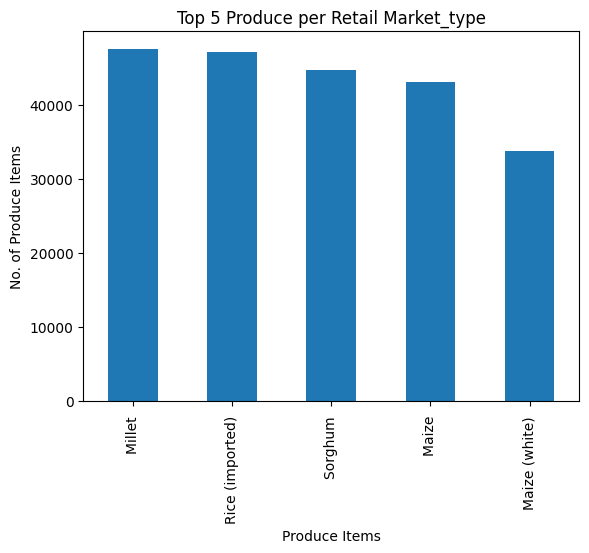

In [34]:
Retail_group = df.groupby("Market_type").get_group("Retail")
Produce_counts = Retail_group["Produce"].value_counts().head()
Produce_counts.plot(kind="bar", title="Top 5 Produce per Retail Market_type")
plt.xlabel("Produce Items")
plt.ylabel("No. of Produce Items")
plt.show()

### 2. What are the countries with the highest number of produce items?

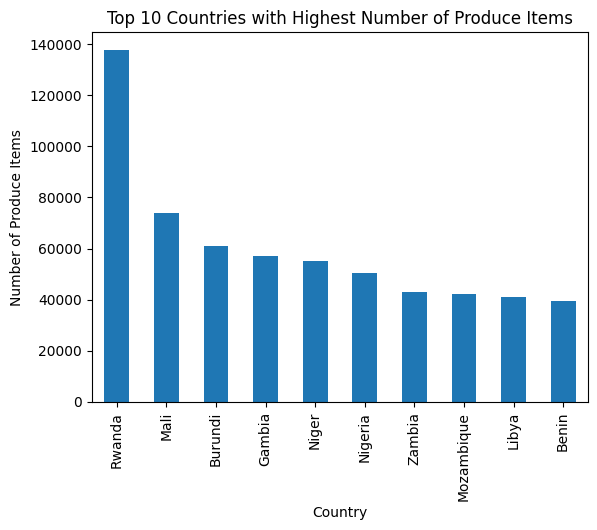

In [35]:
Country_produce_counts = df.groupby("Country")["Produce"].count()
Top_countries = Country_produce_counts.nlargest(10)
Top_countries.plot(kind="bar", title="Top 10 Countries with Highest Number of Produce Items")
plt.xlabel("Country")
plt.ylabel("Number of Produce Items")
plt.show()

### 3. What are the countries with the highest number of produce items per year?

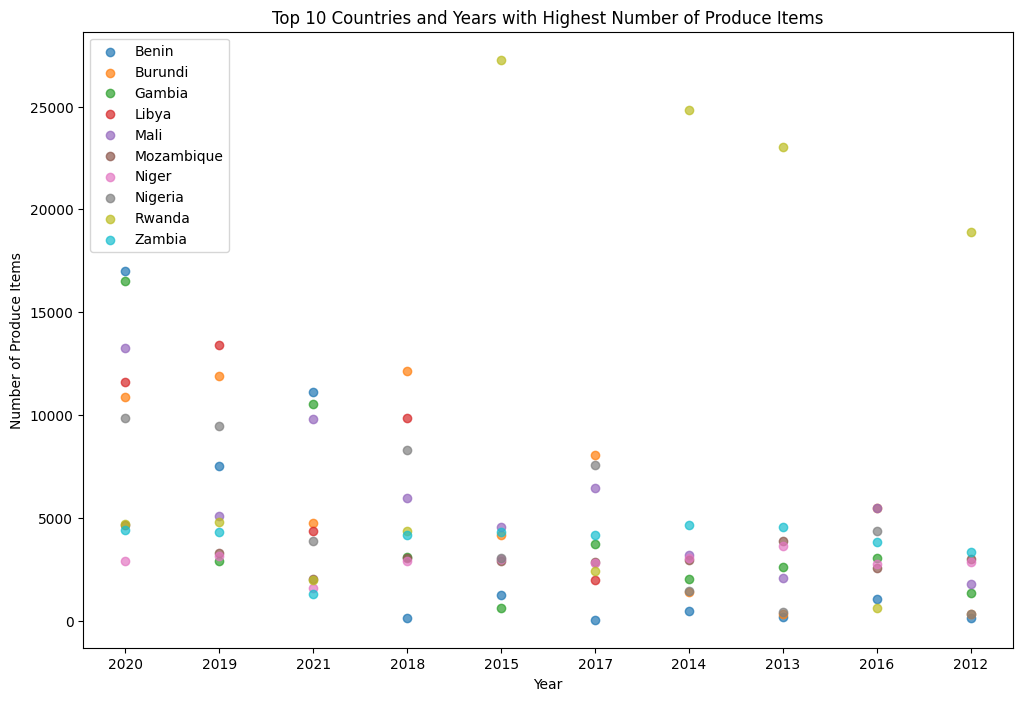

In [36]:
country_year_produce_counts = df.groupby(["Country", "Year"])["Produce"].count()
top_years = country_year_produce_counts.groupby("Year").sum().nlargest(10).index
top_countries = country_year_produce_counts.groupby("Country").sum().nlargest(10).index

# Filter the data for the top 10 years and top 10 countries
top_countries_counts = country_year_produce_counts.loc(axis=0)[top_countries, top_years]

plt.figure(figsize=(12, 8))
for country, data in top_countries_counts.groupby("Country"):
    plt.scatter(data.index.get_level_values("Year"), data.values, label=country, alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Number of Produce Items")
plt.title("Top 10 Countries and Years with Highest Number of Produce Items")

# Add legend
plt.legend()

# Show the plot
plt.show()

### 4. What is Food Item with the most Country producing it?

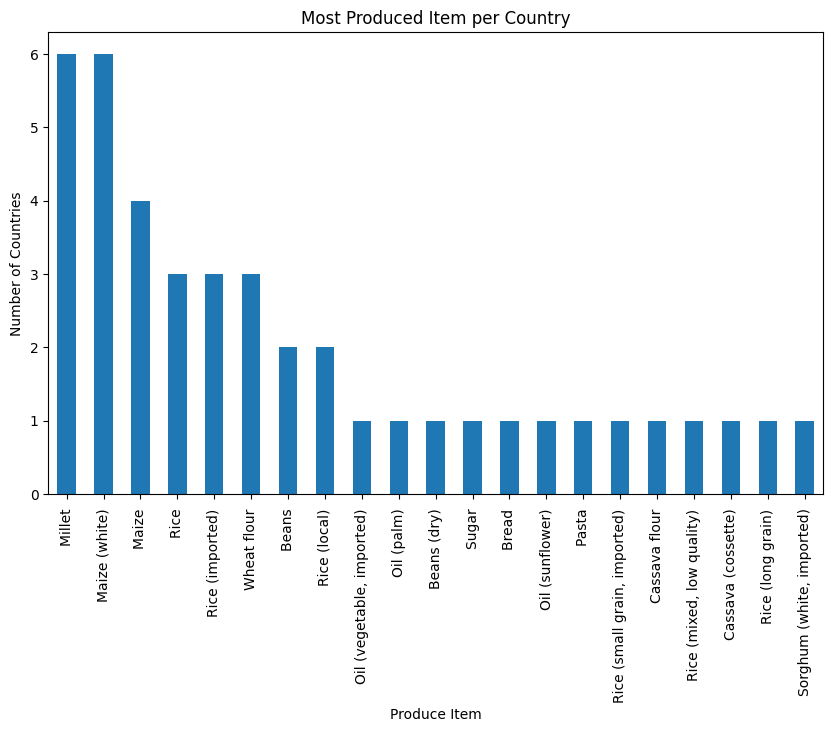

In [37]:
# Find the produce item that each country produces the most
top_produce_per_country = df.groupby("Country")["Produce"].agg(lambda x: x.value_counts().idxmax())

# Count the occurrences of each top produce item
top_produce_counts = top_produce_per_country.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
top_produce_counts.plot(kind="bar", title="Most Produced Item per Country")

# Add labels
plt.xlabel("Produce Item")
plt.ylabel("Number of Countries")

# Show the plot
plt.show()

##### Save the cleaned and transformed dataset

In [ ]:
df.to_csv(r'C:\Users\PROGRESSIVE\3D Objects\PRACTICE\africa_food_prices.csv', index=False)